In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
def f1(omega):
  def rhs(t, X):
    x, y = X
    return [y, -omega**2*x]
  return rhs


In [3]:
rhs = f1(1.)
rhs(10., [1,2])


[2, -1.0]

In [4]:
def eq_quiver(rhs, limits, N = 16):
  xlims, ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N, N))
  V = np.zeros((N, N))
  for i, y in enumerate(ys):
    for j, x in enumerate(xs):
      vfield = rhs(0.,[x,y])
      u, v = vfield
      U[i][j] = u
      V[i][j] = v
  return xs, ys, U, V

In [5]:
def polotonPlane(rhs, limits):
  plt.close()
  plt.figure(figsize=(5, 5))
  xlims,ylims = limits
  plt.xlim(xlims[0], xlims[1])
  plt.ylim(ylims[0], ylims[1])
  xs, ys, U, V = eq_quiver(rhs, limits)
  plt.quiver(xs, ys, U, V, alpha=0.8)


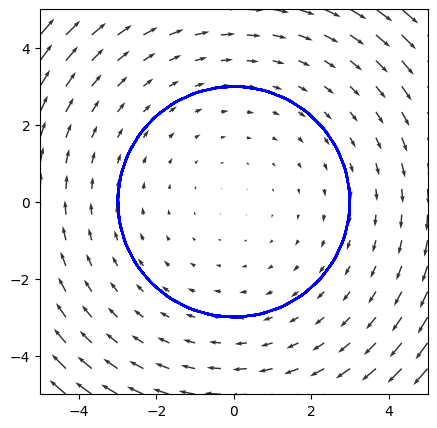

In [6]:
omega = 1.
rhs = f1(omega)
polotonPlane(rhs, [(-5,5), (-5,5)])
sol1 = solve_ivp(rhs, [0., 100.], (0.,3.), method = 'RK45', rtol = 1e-12)
x1, y1 = sol1.y
plt.plot(x1, y1, 'b-')

На след. паре:
x'' + 2ax + bx = 0
Сепаратрисы желтыми, устойчивые. синим, неустойч. красным.

Для решения задачи нужно будет программно выискивать сост.равн. Помогут функции из numpy. Найти их.

Отрисовать.

Два параметра. Сделать так, чтобы можно было перзапускать с разными параметрами.

Состояни руками, но нужно построить портреты всех качественно разных вариантов.

Подбираем параметры, чтобы все рассмотреть случаи.

Лучше сделать сразу несколько рисунков, чтобы не ждать, пока перерисовывается


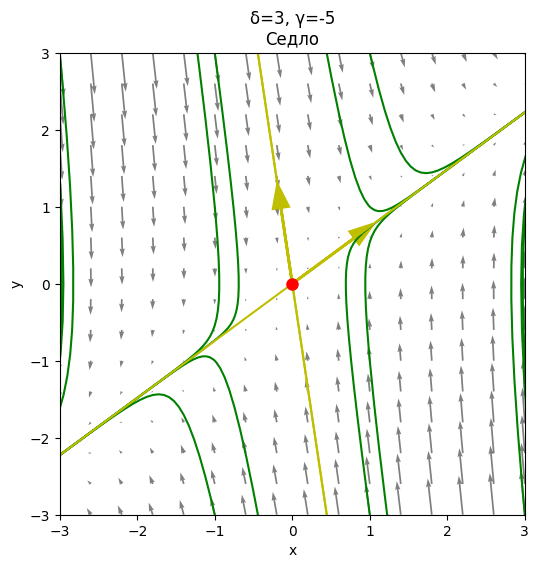

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols, diff

def lin_osc(delta, gamma):
  def rhs(t, X):
    x, y = X
    return [y, -2*delta*y - gamma*x]
  return rhs

def analyze_stability(rhs):
  J = [[0, 1], [-gamma, -2*delta]]
  eigvals, eigvecs = np.linalg.eig(J)
  eigvecs = eigvecs.T

  stability = "Неизвестно"
  if np.all(np.real(eigvals) < 0):
    if np.all(np.imag(eigvals) == 0):
      stability = "Устойчивый узел"
    else:
      stability = "Устойчивый фокус"
  elif np.all(np.real(eigvals) > 0):
    if np.all(np.imag(eigvals) == 0):
      stability = "Нестойчивый узел"
    else:
      stability = "Нестойчивый фокус"
  elif np.all(np.real(eigvals) == 0) and np.all(np.imag(eigvals) != 0):
    stability = "Бифуркация Андронова — Хопфа"
  elif np.any(np.real(eigvals) > 0) and np.any(np.real(eigvals) < 0):
    stability = "Седло"
  else:
    stability = "Линия устойчивости"

  return stability, eigvals, eigvecs

def eq_quiver(rhs, limits, N=16):
  xlims, ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N, N))
  V = np.zeros((N, N))
  for i, y in enumerate(ys):
    for j, x in enumerate(xs):
      u, v = rhs(0., (x, y))
      U[i][j] = u
      V[i][j] = v
  return xs, ys, U, V

def plot_trajectories():
  for x0 in np.linspace(-3, 3, 4):
    for y0 in np.linspace(-3, 3, 4):
      sol_pos = solve_ivp(rhs, [0., 10.], (x0, y0), method="RK45", rtol=1e-12)
      xsol_pos, ysol_pos = sol_pos.y

      sol_neg = solve_ivp(rhs, [0., -10.], (x0, y0), method="RK45", rtol=1e-12)
      xsol_neg, ysol_neg = sol_neg.y

      xsol = np.concatenate((xsol_neg[::-1], xsol_pos))
      ysol = np.concatenate((ysol_neg[::-1], ysol_pos))
      plt.plot(xsol, ysol, 'g-')
def plot_separatrisses(eigvecs):
  for eigvec in eigvecs:
      sol_pos1 = solve_ivp(rhs, [0., 10.], (eigvec[0]*0.01, eigvec[1]*0.01), method="RK45", rtol=1e-12)
      xsol_pos1, ysol_pos1 = sol_pos1.y
      sol_neg1 = solve_ivp(rhs, [0., -10.], (eigvec[0]*0.01, eigvec[1]*0.01), method="RK45", rtol=1e-12)
      xsol_neg1, ysol_neg1 = sol_neg1.y

      xsol1 = np.concatenate((xsol_neg1[::-1], xsol_pos1))
      ysol1 = np.concatenate((ysol_neg1[::-1], ysol_pos1))
      plt.plot(xsol1, ysol1, 'y-')

      sol_pos2 = solve_ivp(rhs, [0., 10.], (-eigvec[0]*0.01, -eigvec[1]*0.01), method="RK45", rtol=1e-12)
      xsol_pos2, ysol_pos2 = sol_pos2.y
      sol_neg2 = solve_ivp(rhs, [0., -10.], (-eigvec[0]*0.01, -eigvec[1]*0.01), method="RK45", rtol=1e-12)
      xsol_neg2, ysol_neg2 = sol_neg2.y

      xsol2 = np.concatenate((xsol_neg2[::-1], xsol_pos2))
      ysol2 = np.concatenate((ysol_neg2[::-1], ysol_pos2))
      plt.plot(xsol2, ysol2, 'y-')

      plt.arrow(0, 0, eigvec[0], eigvec[1], head_length=0.3, head_width=0.2, fc='y', ec='y', linewidth=2)

def lead_manifold_plot(eigvals, eigvecs):
  if (abs(eigvals[0]) < abs(eigvals[1])):
    lead_manifold = 0.01*eigvecs[0]
  else:
    lead_manifold = 0.01*eigvecs[1]

  sol_pos1 = solve_ivp(rhs, [0., 10.], (lead_manifold[0], lead_manifold[1]), method="RK45", first_step=0.01, max_step=0.01, rtol=1e-12)
  xsol_pos1, ysol_pos1 = sol_pos1.y
  sol_neg1 = solve_ivp(rhs, [0., -10.], (lead_manifold[0], lead_manifold[1]), method="RK45", first_step=0.01, max_step=0.01, rtol=1e-12)
  xsol_neg1, ysol_neg1 = sol_neg1.y

  xsol1 = np.concatenate((xsol_neg1[::-1], xsol_pos1))
  ysol1 = np.concatenate((ysol_neg1[::-1], ysol_pos1))
  plt.plot(xsol1, ysol1, 'y-')

  sol_pos2 = solve_ivp(rhs, [0., 10.], (-lead_manifold[0], -lead_manifold[1]), method="RK45", first_step=0.01, max_step=0.01, rtol=1e-12)
  xsol_pos2, ysol_pos2 = sol_pos2.y
  sol_neg2 = solve_ivp(rhs, [0., -10.], (-lead_manifold[0], -lead_manifold[1]), method="RK45", first_step=0.01, max_step=0.01, rtol=1e-12)
  xsol_neg2, ysol_neg2 = sol_neg2.y

  xsol2 = np.concatenate((xsol_neg2[::-1], xsol_pos2))
  ysol2 = np.concatenate((ysol_neg2[::-1], ysol_pos2))
  plt.plot(xsol2, ysol2, 'y-')

def plane_plot(rhs, limits):
  plt.close()
  rhs = lin_osc(delta, gamma)
  stability, eigvals, eigvecs = analyze_stability(rhs)

  plt.figure(figsize=(6, 6))
  plt.title(f"δ={delta}, γ={gamma}\n{stability}")
  plt.xlabel('x')
  plt.ylabel('y')
  xlims, ylims = limits
  plt.xlim(xlims[0], xlims[1])
  plt.ylim(ylims[0], ylims[1])

  xs, ys, U, V = eq_quiver(rhs, limits)
  plt.quiver(xs, ys, U, V, alpha=0.5)

  plot_trajectories()

  if stability == "Седло":
    plot_separatrisses(eigvecs)

  if stability in ["Устойчивый узел", "Нестойчивый узел"]:
    lead_manifold_plot(eigvals, eigvecs)

  if stability in ["Устойчивый узел", "Устойчивый фокус"]:
    plt.plot(0, 0, 'bo', markersize=8)
  elif stability in ["Нестойчивый узел", "Нестойчивый фокус", "Седло"]:
    plt.plot(0, 0, 'ro', markersize=8)
  elif stability == "Бифуркация Андронова — Хопфа":
    plt.plot(0, 0, 'go', markersize=8)

  plt.show()

# Седло
delta = 3
gamma = -5
rhs = lin_osc(delta, gamma)
plane_plot(rhs, [(-3., 3.), (-3., 3.)])

# Неустойчивый узел
delta = -3
gamma = 3
rhs = lin_osc(delta, gamma)
plane_plot(rhs, [(-3., 3.), (-3., 3.)])

# Неустойчивый фокус
delta = -0.1
gamma = 1
rhs = lin_osc(delta, gamma)
plane_plot(rhs, [(-3., 3.), (-3., 3.)])

# Андронов Хопф
delta = 0
gamma = 5
plane_plot(rhs, [(-3., 3.), (-3., 3.)])

# Неустойчивый фокус
delta = 0.1
gamma = 1
rhs = lin_osc(delta, gamma)
plane_plot(rhs, [(-3., 3.), (-3., 3.)])

# Устойчивый узел
delta = 3
gamma = 3
rhs = lin_osc(delta, gamma)
plane_plot(rhs, [(-3., 3.), (-3., 3.)])